<a href="https://colab.research.google.com/github/AlbertoGhub/Testing_projects/blob/main/ALBERTO_Proyecto_M5_Aprendizaje_profundo_con_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 5: Aprendizaje profundo con redes neuronales
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 5! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo. 



# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predetector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).
- Calcula la precisión y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).
- Prueba tu modelo con esta noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/
- Prueba tu modelo con esta noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/ (2 puntos por ambas comprobaciones).

## Punto extra
- Usa PyTorch para el entrenamiento.



In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import seaborn as sns
from keras.utils.data_utils import pad_sequences
from keras.layers import Input, Embedding, Bidirectional, Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing data
# 1. Real data: This is the data we are going to build our model
df = pd.read_csv("/content/drive/MyDrive/MI_PERSONAL_PROJECT/ALBERTO_Proyecto_M5/Data/Fake_News_Classification_Dataset.csv")

# 2. Uploading the testing sample so we can check the accuracy of the model
testing_news_sample = pd.read_csv("/content/drive/MyDrive/MI_PERSONAL_PROJECT/ALBERTO_Proyecto_M5/example_news.csv")

In [ ]:
# Getting the shape of the data and column names:

print(f"Shape of Fake_News_Classification_Dataset: {df.shape}\n\nFeature's name: {df.columns}")

Shape of Fake_News_Classification_Dataset: (72134, 4)

Feature's name: Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [ ]:
# Data type (Although it is shown in the previous script)
df.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

In [ ]:
# Showing a snap of the data
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
# Removing the Unnamed column
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
# Showing a snap of the data
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
# Length
original_length = len(df)

print(f"This is the data's frame length before the cleaning:\n\n{original_length}\n")
print("In future excecutions we will only work with 1000 just to be able to excecute the code on this PC")

This is the data's frame length before the cleaning:

72134

In future excecutions we will only work with 1000 just to be able to excecute the code on this PC


In [ ]:
# checking the NaNs
df.isna().sum()

title    558
text      39
label      0
dtype: int64

In [ ]:
# Showing the percentage representation of it

dicti = dict((df.isna().sum())*100/len(df))
print(f"PRESENTED PERCENTAGES:\n\n1. title: {np.around(dicti['title'], 2)}%\n2. text: {np.around(dicti['text'], 2)}%\n3. label: {np.around(dicti['label'], 2)}%")

PRESENTED PERCENTAGES:

1. title: 0.77%
2. text: 0.05%
3. label: 0.0%


In [ ]:
# Dropping NaNs since the percentage is not representative compare to amount of data (72134)
df.dropna(inplace=True);

In [ ]:
# Checking the data
print(f"We went from {original_length} to {len(df)}.")
print(f"We just removed {original_length - len(df)}.")
print(f"This portion of the data represents {np.around((original_length - len(df))*100/72134, 2)}% from the original total amount.")

We went from 72134 to 71537.
We just removed 597.
This portion of the data represents 0.83% from the original total amount.


In [ ]:
# Checking again
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
# Getting the shape of the data and column names:
print(f"Shape of Fake_News_Classification_Dataset: {df.shape}\n\nFeature's name: {df.columns}")

Shape of Fake_News_Classification_Dataset: (71537, 3)

Feature's name: Index(['title', 'text', 'label'], dtype='object')


In [ ]:
# Since the dtypes is showing objects and not numbers, then, we need to either 
# do it individually as I did or do it with df.describe(include="all")
# https://www.sharpsightlabs.com/blog/pandas-describe/

In [ ]:
# Title statistics:
title_length = df.title.str.split().str.len()
title_length.describe()

count    71537.000000
mean        12.265695
std          4.132163
min          1.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         72.000000
Name: title, dtype: float64

In [ ]:
# Text statistics:
text_length = df.text.str.split().str.len()
text_length.describe()

count    71537.000000
mean       544.562814
std        626.341486
min          0.000000
25%        232.000000
50%        401.000000
75%        670.000000
max      24234.000000
Name: text, dtype: float64

The statistics for the whole dataset is shown as follows:

  1. The ***title*** attribute has a higher word count with an average of 544 words and 75% with more than 600 words.

  2. The ***text*** attribute is a short word count with an average of 12 words, and 75% of them are around 14 words.
  
  3. Finally, we need to realize that this statistics are with whole data frame of 7100+. We well need to run it with the sample of 1000.

1: Unreliable
0: Reliable

Distribution of labels:

1    36509
0    35028
Name: label, dtype: int64



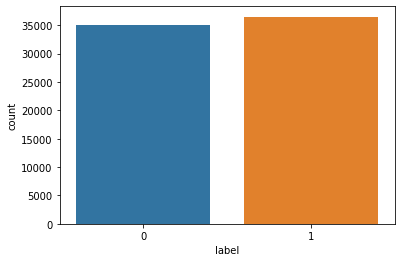

In [ ]:
sns.countplot(x="label", data=df);
print("1: Unreliable")
print("0: Reliable")
print("\nDistribution of labels:\n")
print(f"{df.label.value_counts()}\n");

In [ ]:
# Another way of checking the percentages
print(round(df.label.value_counts(normalize=True),2)*100);

1    51.0
0    49.0
Name: label, dtype: float64


The number of unreliable articles (false or 1) is 36509, while the number of reliable articles (reliable or 0) is 35028. Almost 51% of the articles are false. Therefore, the accuracy metric will measure how well our model performs in building a classifier.

Data cleaning for analysis
In this section, we will clean our dataset to do some analysis:

  1. Remove unused rows and columns (not applicable).
  2. Perform null value imputation (remove NaNs in case the percentage is not representative compared to the whole data set).
  3. Remove special characters.
  4. Remove empty words.

### At this step:

1. Now as stated, this data set is way too big to excecute.
2. What we are going to do is to take a random sample (1000 with a seed(42)) so we can test the neuronal network.
3. At the end, we are going to test with a testing file (another fake news file "pruebas") to check the performance.

In [ ]:
random_df = df.sample(n = 2000, random_state = 42)
random_df

,title,text,label
54359,Live at Truthdig: Robert Scheer and Thomas Fra...,Live at Truthdig: Robert Scheer and Thomas Fra...,1
6993,The Mirage of a Return to Manufacturing Greatn...,"Half a century ago, harvesting California’s 2....",0
28912,British PM expected to offer to fill post-Brex...,(Reuters) - The British government has told Ge...,0
65965,Checkmating Obama,Originally published by the Jerusalem Post . \...,1
2307,Thirty-eight injured in police charges in Cata...,MADRID (Reuters) - Emergency services have att...,0
...,...,...,...
14790,TRUMP SLAMS ABC For Ignoring Pro-Life March Wh...,Watch:MUIR: And as we walked through the White...,1
438,"As Clinton moves to brink of nomination, Sande...",While Hillary Clinton moved to the brink of cl...,0
67513,Trump Demands Apology From The Media And Gets...,"Donald Trump, the pathetic man who has yet to ...",1
70476,OFF HER ROCKER! MAXINE WATERS: Trump Has ‘Tend...,"Rep. Maxine Waters (D., Calif.) Monday accused...",1


### As we can see, this is a sample with 1000 rows. Let's work with this dataframe so we can run it faster

In [ ]:
# Let's check the data just in case
random_df.isna().sum()

title    0
text     0
label    0
dtype: int64

### Now that we have the dataset cleaned, we are going to merge the Text and title columns so they are just one string

In [ ]:
# Merging the text file into the title one:

# Original sample
random_df["Text_Title_Merged"] = random_df["title"] + " " + random_df["text"]

# Testing news
testing_news_sample["Text_Title_Merged"] = testing_news_sample["title"] + " " + testing_news_sample["text"] 

In [ ]:
# Snap of original sample
random_df.head(5)

,title,text,label,Text_Title_Merged
54359,Live at Truthdig: Robert Scheer and Thomas Fra...,Live at Truthdig: Robert Scheer and Thomas Fra...,1,Live at Truthdig: Robert Scheer and Thomas Fra...
6993,The Mirage of a Return to Manufacturing Greatn...,"Half a century ago, harvesting California’s 2....",0,The Mirage of a Return to Manufacturing Greatn...
28912,British PM expected to offer to fill post-Brex...,(Reuters) - The British government has told Ge...,0,British PM expected to offer to fill post-Brex...
65965,Checkmating Obama,Originally published by the Jerusalem Post . \...,1,Checkmating Obama Originally published by the ...
2307,Thirty-eight injured in police charges in Cata...,MADRID (Reuters) - Emergency services have att...,0,Thirty-eight injured in police charges in Cata...


In [ ]:
# Column names
random_df.columns

Index(['title', 'text', 'label', 'Text_Title_Merged'], dtype='object')

In [ ]:
# Snap of the testing news
testing_news_sample.head()

,title,text,label,Text_Title_Merged
0,"Reptilians reveal themselves to world, denounc...","Last week, while billions were watching their ...",1,"Reptilians reveal themselves to world, denounc..."
1,US to pay $6.5 million in lost wages owed to M...,"Some 13,000 Mexican migrant workers are owed $...",0,US to pay $6.5 million in lost wages owed to M...


## Data processing:

1. Splitting X and y.
2. Spliting the text into number of words and adding it to the dataset.
3. Splitting into training and testing sets.
4. Tokenizing the sets.

In [ ]:
# Splitting the data X & y - Original sample
X = random_df["Text_Title_Merged"]
y = random_df["label"]

# Splitting the data X & y - Testing news
X_1 = testing_news_sample["Text_Title_Merged"]
y_1 = testing_news_sample["label"]

In [ ]:
# Spliting the text into number of words and adding it to the dataset.
# At this point, what we are doing is just to create a function that counts 
# the number of words in the specific row and adding it to the dataset.

# Original sample
random_df["Word_number"] = random_df["Text_Title_Merged"].apply(lambda x: len(x.split()))

# Testing news
testing_news_sample["Word_number"] = testing_news_sample["Text_Title_Merged"].apply(lambda x_1: len(x_1.split()))

In [ ]:
# Checking new data set - Original dataset
random_df.head()

,title,text,label,Text_Title_Merged,Word_number
54359,Live at Truthdig: Robert Scheer and Thomas Fra...,Live at Truthdig: Robert Scheer and Thomas Fra...,1,Live at Truthdig: Robert Scheer and Thomas Fra...,127
6993,The Mirage of a Return to Manufacturing Greatn...,"Half a century ago, harvesting California’s 2....",0,The Mirage of a Return to Manufacturing Greatn...,1238
28912,British PM expected to offer to fill post-Brex...,(Reuters) - The British government has told Ge...,0,British PM expected to offer to fill post-Brex...,85
65965,Checkmating Obama,Originally published by the Jerusalem Post . \...,1,Checkmating Obama Originally published by the ...,1739
2307,Thirty-eight injured in police charges in Cata...,MADRID (Reuters) - Emergency services have att...,0,Thirty-eight injured in police charges in Cata...,70


In [ ]:
# Checking new data set - Testing dataset
testing_news_sample.head()

,title,text,label,Text_Title_Merged,Word_number
0,"Reptilians reveal themselves to world, denounc...","Last week, while billions were watching their ...",1,"Reptilians reveal themselves to world, denounc...",438
1,US to pay $6.5 million in lost wages owed to M...,"Some 13,000 Mexican migrant workers are owed $...",0,US to pay $6.5 million in lost wages owed to M...,298


In [ ]:
# Splitting into training and testing sets.

# Stratify: When we have a classification problem, the stratify parameter ensures that the proportion of target classes in 
# the dataset is maintained in both the training and testing sets. This is important because it helps to avoid 
# bias in the evaluation of the model's performance.
# We apply this always in the targe variable.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size =0.20, stratify=y)

In [ ]:
X_test

54498    This smart, harmless pesticide patent could ta...
14065    NFL PLAYER Delivers Courageous Message: Stop B...
571      Silent But Deadly - Russia Developing Devastat...
37843    Trump Aides Address His Wiretap Claims: ‘That’...
20554     Two Major Breaking Allegations Against Michae...
                               ...                        
37691    Russia rejects lawsuit to learn fate of Swedis...
51793    Neal Katyal at 9th Circuit: If Trump Says ’Isl...
14188    UNIVERSITY PRESIDENT APOLOGIZES TO TRAUMATIZED...
66528    German ex-rightist jailed for plotting Islamis...
26973    Raghuram Rajan, India’s Departing Central Bank...
Name: Text_Title_Merged, Length: 400, dtype: object

In [ ]:
# Tokenizing the sets.

# Creating the object (instantiating)
token = Tokenizer()

# The fit_on_texts method takes a list of strings as its input, where each string represents a document in the corpus.
token.fit_on_texts(X_train)

# Parsing the words into a list of integers representing the words in the corresponding text.
sequence_train = token.texts_to_sequences(X_train)
sequence_test = token.texts_to_sequences(X_test)
news_sequence = token.texts_to_sequences(X_1)

# Using word_index, you will have the words into a dictionary
# That's to say, it returns a dictionary that maps each unique word in the corpus to a unique integer.

word_size = len(token.word_index) + 1
word_size

44515

In [ ]:
# sequence_test

### Reference to tune the model: 
https://medium.com/analytics-vidhya/understanding-nlp-keras-tokenizer-class-arguments-with-example-551c100f0cbd#:~:text=num_words%20is%20nothing%20but%20your,word_index)%20%2B%201%22.

## Testing the neuronal network

1. Importing keras and pad_sequences
2. importing tensorflow and keras layers
3. compile the model
4. Train the model with keras
5. Checking the accuracy
    * Upload the testing data 
6. Confusion matrix y_hat vs y_test

Def: In Keras, the pad_sequences function is used to pad sequences to a specific length. Padding sequences can be useful when working with sequences of variable lengths, such as text data or time series data: 

from keras.utils.data_utils import pad_sequences

In [ ]:
# Importing keras and pad_sequences:
# Now we are preparing the neuronal network by padding the sequence of numbers we tokenized before:

# Instead of creating the "largo" variable, I set the number directly
length = 500
seq_train = pad_sequences(sequence_train, maxlen = length)
seq_test = pad_sequences(sequence_test, maxlen = length)
seq_news = pad_sequences(news_sequence, maxlen = length)

In [ ]:
# Now we have and array of the sequences apiece:
seq_test
type(seq_test)

numpy.ndarray

In [ ]:
seq_train

array([[12568,  3197,    17, ..., 23998, 23999,  3199],
       [    0,     0,     0, ...,   447,    10,   262],
       [  339,     3, 12589, ...,  1469,    63,  1453],
       ...,
       [    0,     0,     0, ...,  5195,  1223,   853],
       [23937,  2340,  1942, ...,   451,  2904,  1010],
       [  621,    28,     1, ...,     9,  9493,    19]], dtype=int32)

Long Short-Term Memory (LSTM): In Keras, the Long Short-Term Memory (LSTM) layer is a type of recurrent neural network (RNN) layer that is often used for sequence modeling tasks such as language modeling, speech recognition, and time series forecasting

Embedding: In Keras, an embedding layer is used to represent words or categorical variables as continuous vectors in a high-dimensional space. This is often useful in natural language processing tasks such as text classification, language modeling, and machine translation.

Dropout: In Keras, the Dropout layer is a regularization technique that is often used in neural networks to prevent overfitting. The Dropout layer randomly sets a fraction of the input units to 0 at each update during training time, which can help prevent the model from relying too heavily on any one input feature.

Dense: A Dense layer represents a fully connected layer, in which every neuron in the layer is connected to every neuron in the previous layer. The output of a Dense layer is obtained by applying a linear transformation followed by a non-linear activation function.

In [ ]:
# Importing tensorflow and keras layers
# Applying the model to the network

model = tf.keras.Sequential([
 
    Input(name = "input", shape = [length]), 
    Embedding(len(token.word_index)+1, 128), 
    Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)), 
    Bidirectional(tf.keras.layers.LSTM(64)), 
    Dense(64, activation = "relu"), 
    Dropout(0.5), 
    Dense(1, activation = "sigmoid"),
    keras.layers.Dense(2, activation=tf.nn.softmax)
#     Dense(3, activation=tf.nn.softmax)
    
])

In [ ]:
# Compile the model:

model.compile(loss = tf.keras.losses.BinaryCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(1e-4), 
              metrics = ["accuracy"])

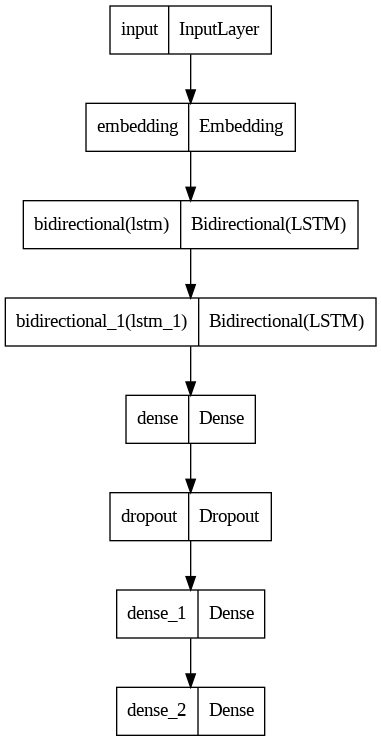

In [ ]:
# Printing the model architechture:
tf.keras.utils.plot_model(model)

In [ ]:
# Train the model with keras:

history = model.fit(seq_train, y_train, 
    epochs=5,
    validation_split = 0.2, 
    batch_size = 64,
    callbacks=[EarlyStopping(monitor='val_accuracy',mode='max',
                             patience=3, verbose=False,restore_best_weights=True)])

Epoch 1/5
20/20 [==============================] - 140s 6s/step - loss: 0.6965 - accuracy: 0.5070 - val_loss: 0.6961 - val_accuracy: 0.4531
Epoch 2/5
20/20 [==============================] - 115s 6s/step - loss: 0.6956 - accuracy: 0.5070 - val_loss: 0.6950 - val_accuracy: 0.4531
Epoch 3/5
20/20 [==============================] - 115s 6s/step - loss: 0.6943 - accuracy: 0.5078 - val_loss: 0.6935 - val_accuracy: 0.4531
Epoch 4/5
20/20 [==============================] - 116s 6s/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.5469
Epoch 5/5
20/20 [==============================] - 112s 6s/step - loss: 0.6932 - accuracy: 0.4875 - val_loss: 0.6932 - val_accuracy: 0.5469


In [ ]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          5697920   
                                                                 
 bidirectional (Bidirectiona  (None, 500, 256)         263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [ ]:
# Checking the accuracy/Evaluating the model

test_loss, test_acc = model.evaluate(seq_news, y_1)
y_hat = model.predict(seq_test)

# Printing the results:

print(f"The model is giving us a loss of : {np.around(test_loss*100, 2)}%")
print(f"On the other hand, it gives us an accuracy of: {np.around(test_acc*100, 2)}%")


13/13 [==============================] - 15s 1s/step
The model is giving us a loss of : 69.32%
On the other hand, it gives us an accuracy of: 50.0%


In [ ]:
print(f"y_test: {type(y_test)}\n\ny_hat: {type(y_hat)}")

y_test: <class 'pandas.core.series.Series'>

y_hat: <class 'numpy.ndarray'>


In [ ]:
datos = pd.DataFrame(y_hat, columns=["col_1", "col_2"])
# datos = pd.DataFrame(y_hat)
datos

,col_1,col_2
0,0.498073,0.501927
1,0.497866,0.502134
2,0.498033,0.501967
3,0.498005,0.501995
4,0.497873,0.502127
...,...,...
395,0.497935,0.502065
396,0.497998,0.502002
397,0.498056,0.501944
398,0.497865,0.502135


In [ ]:
y_test

54498    1
14065    1
571      1
37843    0
20554    1
        ..
37691    0
51793    0
14188    1
66528    0
26973    0
Name: label, Length: 400, dtype: int64

In [ ]:
#add 'blocks' array as new column in DataFrame
datos['target'] = y_test.tolist()
datos

,col_1,col_2,target
0,0.498073,0.501927,1
1,0.497866,0.502134,1
2,0.498033,0.501967,1
3,0.498005,0.501995,0
4,0.497873,0.502127,1
...,...,...,...
395,0.497935,0.502065,0
396,0.497998,0.502002,0
397,0.498056,0.501944,1
398,0.497865,0.502135,0


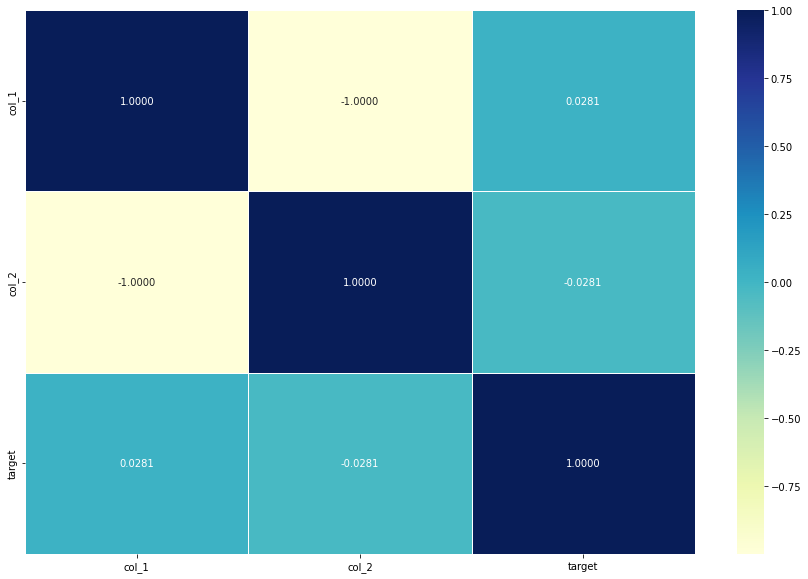

In [ ]:
fig, ax = plt.subplots(figsize=(15,10)) 

ax = sns.heatmap(datos.corr(),  

            annot = True,  

                linewidths = 0.5,  

                fmt = ".4f",  

                cmap = "YlGnBu"); 

# RESOURCES:

1. EXAMPLE - https://morioh.com/p/6f14d03e06bf